# causalimpact

Testing out `causalimpact`, so far I found a bug because of a deprecated pandas type checking method that I had to go and fix. Recommend that you don't use it.

Reference:

* [Git repo](https://github.com/jamalsenouci/causalimpact)
* [Documentation Nbviewer](https://nbviewer.org/github/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb)

In [7]:
from causalimpact import CausalImpact

In [8]:
import arviz as az
import causalpy as cp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-white")

We'll use the data from `CausalPy` first:

In [9]:
df = (
    cp.load_data("brexit")
    .loc[lambda x: x.Time >= "2009-01-01"]
    # manual exclusion of some countries
    .drop(["Japan", "Italy", "US", "Spain", "Portugal"], axis=1)
    .reset_index(drop=True)
)

# specify date of the Brexit vote announcement
treatment_time = pd.to_datetime("2016 June 24")
df.head()

,Time,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Iceland,Luxemburg,Netherlands,New_Zealand,Norway,Sweden,Switzerland,UK
0,2009-01-01,3.84048,0.802836,0.94117,16.93824,4.50096,0.51052,5.05450,6.63471,5.18157,0.114836,1.634391,0.47336,7.78753,10.32220,1.476532,4.61881
1,2009-04-01,3.86954,0.796545,0.94162,16.75340,4.41372,0.50829,5.05375,6.64530,5.16171,0.116259,1.634432,0.47916,7.71903,10.32867,1.485509,4.60431
2,2009-07-01,3.88115,0.799937,0.95352,16.82878,4.42898,0.51299,5.06237,6.68237,5.24132,0.118747,1.640982,0.48188,7.72400,10.32328,1.502506,4.60722
3,2009-10-01,3.91028,0.803823,0.96117,17.02503,4.43300,0.50903,5.09832,6.73155,5.22482,0.119302,1.650866,0.48805,7.72812,10.37107,1.515139,4.62152
4,2010-01-01,3.92716,0.800510,0.96615,17.23041,4.47128,0.51413,5.11625,6.78621,4.91128,0.121414,1.647748,0.49349,7.87891,10.64833,1.525864,4.65380


## Estimate the causal effect with `CausalImpact`

1. Specify pre and post period
2. Initialize a `CausalImpact` object and `.run()`

In [10]:
pre_period = [0, 29]
post_period = [30, 52]

In [11]:
ts_data = (df.set_index('Time'))
ts_data.index = pd.to_datetime(ts_data.index)

# Periods must be lists of length 2
ts_pre_period = [min(ts_data.index).to_numpy(), pd.to_datetime('2016-04-01').to_numpy()]
ts_post_period = [pd.to_datetime('2016-07-01').to_numpy(), max(ts_data.index).to_numpy()]

In [12]:
# If you get an error using pandas > 2.0 then it's because you need to use this dtype checker instead of what's in causalimpact/analysis.py
pd.core.dtypes.common.is_datetime64_any_dtype(ts_pre_period[0])

True

In [15]:
ts_impact = CausalImpact(ts_data, ts_pre_period, ts_post_period)
ts_impact.run()

/Users/U0596854/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/causalimpact/misc.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mu = data_mu[0]
/Users/U0596854/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/causalimpact/misc.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_sd = data_sd[0]
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.95248D-01    |proj g|=  9.50545D-01

At iterate    5    f= -1.03230D+00    |proj g|=  3.14696D+00

At iterate   10    f= -1.22269D+00    |proj g|=  1.05363D+00

At iterate   15    f= -1.34179D+00    |proj g|=  3.51482D+00

At iterate   20    f= -1.41317D+00    |proj g|=  2.02359D+00

At iterate   25    f= -1.48658D+00    |proj g|=  7.85971D-01

At iterate   30    f= -1.51947D+00    |proj g|=  1.44398D+00

At iterate   35    f= -1.52750D+00    |proj g|=  3.98855D-01

At iterate   40    f= -1.53748D+00    |proj g|=  3.09870D-01

At iterate   45    f= -1.54278D+00    |proj g|=  5.29569D-01

At iterate   50    f= -1.54686D+00    |proj g|=  2.00848D-01

At iterate   55    f= -1.54866D+00    |proj g|=  1.88754D-01

At iterate   60    f= -1.54964D+00    |proj g|=  4.56077D-01

At iterate   65    f= -1.5

/Users/U0596854/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/WillianFuks/tfcausalimpact/master/tests/fixtures/comparison_data.csv', index_col=['DATE'])
data.index = pd.to_datetime(data.index)
pre_period = ['2019-04-16', '2019-07-14']
post_period = ['2019-7-15', '2019-08-01']
pre_period = [i.to_numpy() for i in pd.to_datetime(pre_period)]
post_period = [i.to_numpy() for i in pd.to_datetime(post_period)]
ci = CausalImpact(data, pre_period, post_period, model_args={'fit_method': 'hmc'})
ci.run()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94785D-01    |proj g|=  8.40252D-01

At iterate    5    f= -3.48985D-01    |proj g|=  1.35271D+00

At iterate   10    f= -4.94301D-01    |proj g|=  2.40262D-01

At iterate   15    f= -5.22570D-01    |proj g|=  8.77488D-01

At iterate   20    f= -5.25765D-01    |proj g|=  3.26948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     67      2     0     0   3.269D-05  -5.258D-01
  F = -0.52576536271386209     

CONVERG

/Users/U0596854/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/causalimpact/misc.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mu = data_mu[0]
/Users/U0596854/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/causalimpact/misc.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_sd = data_sd[0]
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search d

In [36]:
ci.summary()

                               Average          Cumulative
Actual                           78574             1414339
Predicted                        79756             1435624
95% CI                  [77370, 82143]  [1392660, 1478588]
                                                          
Absolute Effect                  -1182              -21284
95% CI                   [1204, -3569]     [21679, -64249]
                                                          
Relative Effect                  -1.5%               -1.5%
95% CI                   [1.5%, -4.5%]       [1.5%, -4.5%]
                                                          
P-value                           0.0%                    
Prob. of Causal Effect          100.0%                    


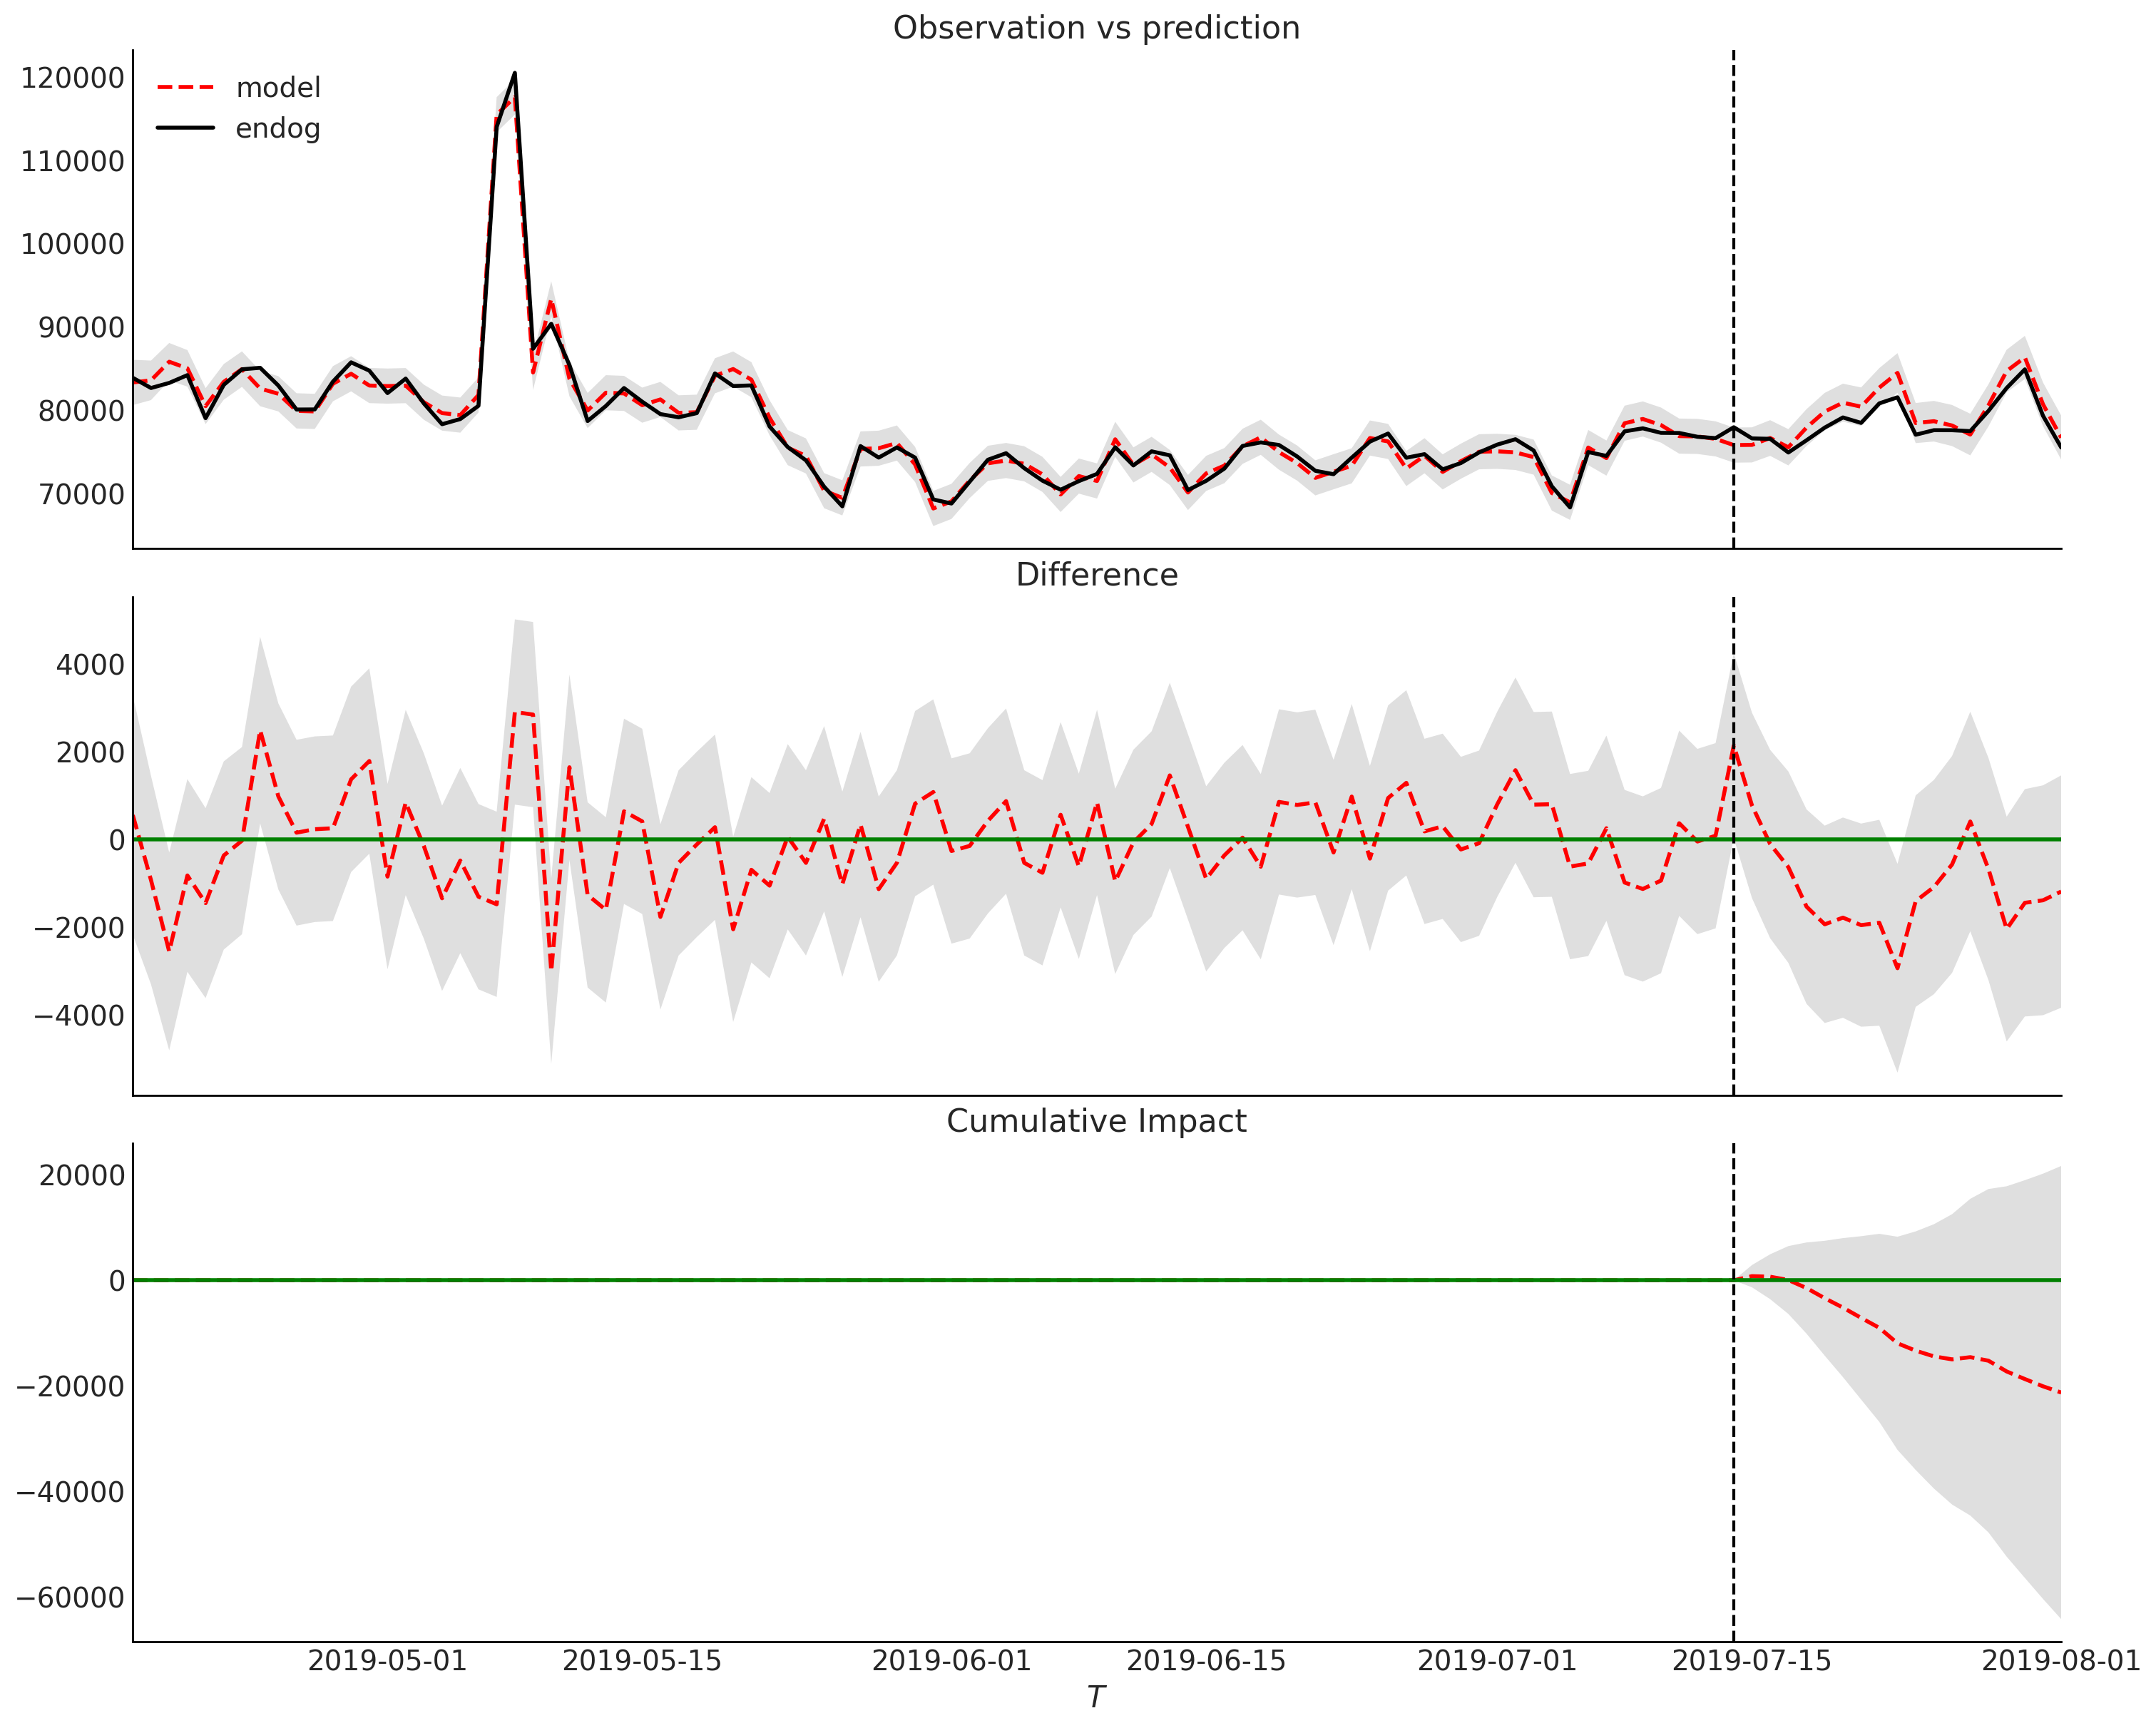

In [37]:
ci.plot()